# Consultas de morbilidad realizadas en el año 2024 (Valparaiso)

### Importación de librerías

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar datos desde el origen (carpeta Data)

In [17]:
df_rem_2024 =    pd.read_csv(
            r'/Users/renzovergara/Documents/Proyectos/analisis-rem-2024/Data/serie-rem-2024/Datos/SerieA2024.csv',
            sep=';',
            encoding='utf-8'
        )

df_establecimientos_salud =    pd.read_excel(
            r'/Users/renzovergara/Documents/Proyectos/analisis-rem-2024/Data/establecimientos-salud/Establecimientos DEIS MINSAL 25-11-2025.xlsx',
            sheet_name='ESTABLECIMIENTO_2025-11-25', header=1,
        )

/opt/homebrew/Caskroom/miniconda/base/envs/analisis-de-datos/lib/python3.13/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


### Lista de establecimientos de Valparaiso

In [18]:
# Columnas dispobiles en el dataframe de establecimientos de salud:
columnas_df_est =['Código Antiguo ', 'Código Vigente', 'Código  Madre Antiguo', 'Código Madre Nuevo', 'Código Región', 'Nombre Región', 'Código Dependencia Jerárquica (SEREMI / Servicio de Salud)', 'Nombre Dependencia Jerárquica (SEREMI / Servicio de Salud)', 'Pertenencia al SNSS', 'Tipo Establecimiento (Unidad)', 'Ámbito de Funcionamiento', 'Nombre Oficial', 'Certificación ', 'Dependencia Administrativa', 'Nivel de Atención', 'Código Comuna', 'Nombre Comuna', 'Vía', 'Número', 'Dirección', 'Teléfono', 'Fecha Inicio Funcionamiento', 'Tiene Servicio de Urgencia', 'Tipo de Urgencia ', 'Clasificación Tipo de SAPU', 'LATITUD [Grados decimales]', 'LONGITUD [Grados decimales]', 'Tipo de Prestador Sistema de Salud', 'Estado de Funcionamiento', 'Nivel de Complejidad', 'Tipo de Atención ', 'Fecha de Incorporación a la base ']
# Selecionar columnas y filtrar establecimientos de salud en la comuna de Valparaíso (código 5101)
cols_seleccion = ['Código Vigente', 'Nombre Oficial', 'Nombre Comuna', 'Dirección', 'Nivel de Atención', 'Dependencia Administrativa']
# df_est_salud_valparaiso = df_establecimientos_salud.loc[(df_establecimientos_salud['Código Comuna'] == 5101) & (df_establecimientos_salud['Nivel de Atención'] == "Primario"), cols_seleccion]
df_est_salud_valparaiso = df_establecimientos_salud.query("`Código Comuna` == 5101 and `Nivel de Atención` == 'Primario' and `Dependencia Administrativa` == 'Municipal'")[cols_seleccion]

df_est_salud_valparaiso.head(50)

,Código Vigente,Nombre Oficial,Nombre Comuna,Dirección,Nivel de Atención,Dependencia Administrativa
3133,106804,SAPU Placilla,Valparaíso,Octava,Primario,Municipal
3134,106304,Centro de Salud Familiar Placilla,Valparaíso,Central,Primario,Municipal
3135,200731,SUR Laguna Verde,Valparaíso,Galvarino,Primario,Municipal
3136,106401,Centro Comunitario de Salud Familiar Laguna Verde,Valparaíso,Galvarino,Primario,Municipal
3142,201086,Centro Comunitario de Salud Familiar Juan Pabl...,Valparaíso,Juan Pablo II,Primario,Municipal
3143,200109,SAPU Reina Isabel II,Valparaíso,Washington,Primario,Municipal
3144,106303,Centro de Salud Familiar Reina Isabel II,Valparaíso,Washington,Primario,Municipal
3148,106306,Centro de Salud Familiar Las Cañas,Valparaíso,Los Alerces,Primario,Municipal
3149,106312,Centro de Salud Familiar Puertas Negras,Valparaíso,Montedónico,Primario,Municipal
3150,106334,Centro de Salud Familiar Padre Damián Molokai,Valparaíso,Cabritería Norte,Primario,Municipal


### Consultas de morbilidad realizadas (REM A04 Seccion A) en APS Municipal

In [24]:
codigos = [
    '03020101',
    '03020201',
    '03020301',
    '03020402',
    '03020403',
    '03020401',
    '03040210',
    '03040220',
    '04040100',
    '04025010',
    '04025020',
    '04025025',
    '04040427',
    '03020501'
]

df_ids_est_salud_valparaiso = df_est_salud_valparaiso['Código Vigente'].tolist()
df_consultas_morbilidad = df_rem_2024.query("(IdEstablecimiento in @df_ids_est_salud_valparaiso) & (CodigoPrestacion in @codigos)")[['IdEstablecimiento', 'Mes', 'Col01']]
group_consultas_morb_establecimiento_mes = df_consultas_morbilidad.groupby(['IdEstablecimiento'])['Col01'].sum().reset_index()
print(group_consultas_morb_establecimiento_mes.sort_values(by=['Col01'], ascending=False).head(20))

    IdEstablecimiento   Col01
6              106307  7927.0
10             106330  7740.0
0              106300  7493.0
4              106304  7285.0
8              106311  6231.0
3              106303  6204.0
11             106334  5375.0
2              106302  5170.0
1              106301  4823.0
9              106312  4100.0
7              106309  4044.0
5              106306  3864.0
12             106401  3568.0
13             106711   104.0
14             201086    24.0


### Grafico 1: Consulta de morbilidad 2024

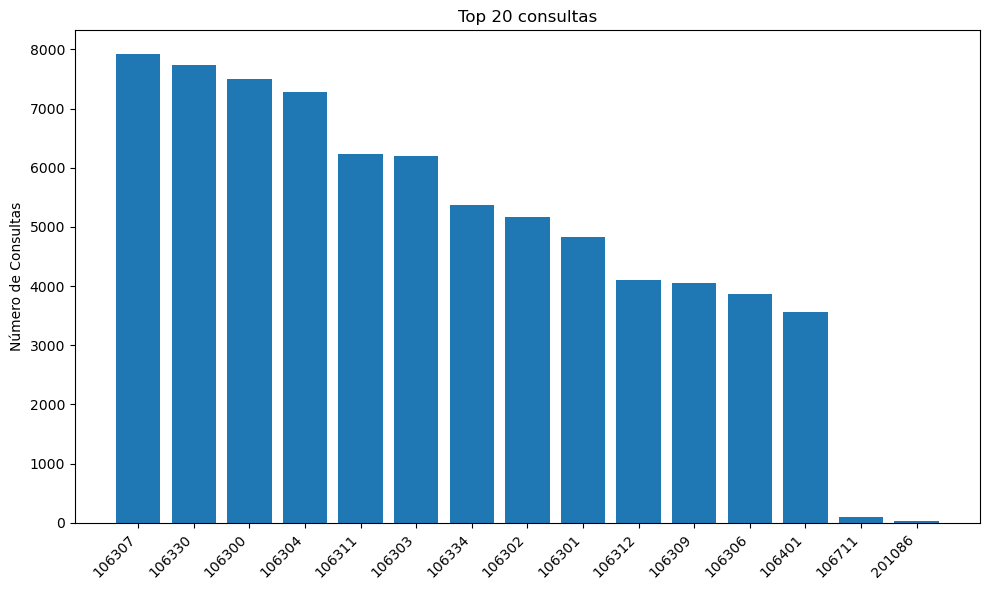

In [25]:
df_top = (
    group_consultas_morb_establecimiento_mes
    .sort_values(by=['Col01'], ascending=False)
    .head(20)
    .reset_index()          # convierte índice a columnas si viene de groupby
)

# Verificar que Col01 es numérico
df_top['Col01'] = pd.to_numeric(df_top['Col01'], errors='coerce')

# Verificación: imprimir si df_top está vacío (para depuración)
if df_top.empty:
    print("df_top está vacío. Verifica los datos de entrada.")
else:
    plt.figure(figsize=(10,6))
    plt.bar(range(len(df_top)), df_top['Col01'])  # Usar índices numéricos para X
    plt.xticks(range(len(df_top)), df_top['IdEstablecimiento'], rotation=45, ha='right')  # Asignar etiquetas
    plt.ylabel('Número de Consultas')  # Cambiar ylabel para claridad
    plt.title('Top 20 consultas')
    plt.tight_layout()
    plt.show()